In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import torch 
import torch.nn as nn
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
dummy = pd.read_csv('data-final.csv',sep = '\t')

In [3]:
df = pd.read_csv('data-final.csv',sep = '\t')


In [4]:
len(df)

1015341

In [5]:
list_columns = np.array(df.columns)
print(list_columns)
len(list_columns)

['EXT1' 'EXT2' 'EXT3' 'EXT4' 'EXT5' 'EXT6' 'EXT7' 'EXT8' 'EXT9' 'EXT10'
 'EST1' 'EST2' 'EST3' 'EST4' 'EST5' 'EST6' 'EST7' 'EST8' 'EST9' 'EST10'
 'AGR1' 'AGR2' 'AGR3' 'AGR4' 'AGR5' 'AGR6' 'AGR7' 'AGR8' 'AGR9' 'AGR10'
 'CSN1' 'CSN2' 'CSN3' 'CSN4' 'CSN5' 'CSN6' 'CSN7' 'CSN8' 'CSN9' 'CSN10'
 'OPN1' 'OPN2' 'OPN3' 'OPN4' 'OPN5' 'OPN6' 'OPN7' 'OPN8' 'OPN9' 'OPN10'
 'EXT1_E' 'EXT2_E' 'EXT3_E' 'EXT4_E' 'EXT5_E' 'EXT6_E' 'EXT7_E' 'EXT8_E'
 'EXT9_E' 'EXT10_E' 'EST1_E' 'EST2_E' 'EST3_E' 'EST4_E' 'EST5_E' 'EST6_E'
 'EST7_E' 'EST8_E' 'EST9_E' 'EST10_E' 'AGR1_E' 'AGR2_E' 'AGR3_E' 'AGR4_E'
 'AGR5_E' 'AGR6_E' 'AGR7_E' 'AGR8_E' 'AGR9_E' 'AGR10_E' 'CSN1_E' 'CSN2_E'
 'CSN3_E' 'CSN4_E' 'CSN5_E' 'CSN6_E' 'CSN7_E' 'CSN8_E' 'CSN9_E' 'CSN10_E'
 'OPN1_E' 'OPN2_E' 'OPN3_E' 'OPN4_E' 'OPN5_E' 'OPN6_E' 'OPN7_E' 'OPN8_E'
 'OPN9_E' 'OPN10_E' 'dateload' 'screenw' 'screenh' 'introelapse'
 'testelapse' 'endelapse' 'IPC' 'country' 'lat_appx_lots_of_err'
 'long_appx_lots_of_err']


110

In [6]:
np.array(df.dtypes)

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'),

In [7]:
df.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [8]:
to_be_dropped = np.array(np.where(df.isnull().sum(axis = 1) > 10))[0]
#np.shape(to_be_dropped)
print(to_be_dropped)
#print(len(to_be_dropped))
df = df.drop(to_be_dropped)
#len(df)

[ 78795  78854  78889 ... 282847 282921 283042]


In [9]:
len(df) 

1013558

In [10]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.012127e+06,1.012127e+06,1.012127e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149357e+03,8.262213e+02,9.599223e+02,6.754233e+02,2.704155e+03,1.044515e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600988e+02,1.802289e+02,5.106891e+04,2.017864e+04,1.485203e+06,3.982098e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [11]:
extrav = df.iloc[:,0:10]
extrav_E = df.iloc[:,50:60]
add_data = df.iloc[:,100:]
agree = df.iloc[:,10:20]
agree_E = df.iloc[:,60:70]
Consci = df.iloc[:,20:30]
Consci_E = df.iloc[:,70:80]
Emo = df.iloc[:,30:40]
Emo_E = df.iloc[:,80:90]
Intel = df.iloc[:,40:50]
Intel_E = df.iloc[:,90:100]

display(extrav)
display(extrav_E)
display(add_data)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0


,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E
0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0
1,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0
2,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0
3,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0
4,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0
...,...,...,...,...,...,...,...,...,...,...
1015336,5694.0,3927.0,4600.0,5255.0,1688.0,2216.0,5064.0,3288.0,4207.0,3807.0
1015337,2382.0,1984.0,3696.0,1736.0,2272.0,2327.0,2088.0,2296.0,1585.0,3287.0
1015338,4077.0,2120.0,1688.0,2528.0,1721.0,2711.0,5329.0,2080.0,2992.0,2952.0
1015339,8647.0,2664.0,3544.0,2263.0,2248.0,3024.0,4704.0,3383.0,2488.0,3183.0


,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...
1015336,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [12]:
add_data.head(10)

,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
5,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05
6,2016-03-03 02:05:00,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556
7,2016-03-03 02:05:08,1440.0,900.0,15.0,210.0,17,1,MY,2.9927,101.7909
8,2016-03-03 02:05:27,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166
9,2016-03-03 02:08:06,1600.0,900.0,6.0,261.0,13,1,FI,60.1708,24.9375


In [13]:
print(len(df['country'].unique()))
print(df['country'].unique())
print(df['country'].isnull().sum())

224
['GB' 'MY' 'KE' 'SE' 'US' 'FI' 'UA' 'PH' 'FR' 'AU' 'IN' 'CA' 'NL' 'ZA'
 'HK' 'BR' 'CH' 'TH' 'IT' 'ES' 'AE' 'HR' 'GR' 'IE' 'OM' 'DE' 'PT' 'SG'
 'NONE' 'RO' 'NO' 'BD' 'BN' 'NG' 'LT' 'ET' 'ID' 'BE' 'AT' 'DK' 'TZ' 'LU'
 'PL' 'JP' 'MX' 'CY' 'UG' 'LK' 'TR' 'MM' 'CO' 'EE' 'AR' 'IS' 'HU' 'PR'
 'PK' 'TN' 'LV' 'CZ' 'NZ' 'RS' 'IL' 'JM' 'CL' 'QA' 'SA' 'VN' 'KZ' 'BA'
 'MU' 'EG' 'PE' nan 'SI' 'JO' 'TW' 'DO' 'DZ' 'KW' 'MA' 'MT' 'TT' 'BS' 'VE'
 'RU' 'KR' 'LR' 'GT' 'BG' 'IM' 'GH' 'SO' 'SK' 'MV' 'CN' 'AZ' 'AL' 'KH'
 'LB' 'UY' 'ZW' 'UZ' 'HN' 'CR' 'GE' 'GI' 'MO' 'NP' 'IR' 'MK' 'MN' 'ZM'
 'NI' 'BH' 'SD' 'BZ' 'GD' 'KY' 'BB' 'CI' 'PG' 'AG' 'VI' 'PY' 'PA' 'SZ'
 'SV' 'ME' 'BM' 'AO' 'KG' 'FJ' 'VC' 'AF' 'RW' 'GG' 'BY' 'GP' 'AX' 'LY'
 'JE' 'MP' 'SY' 'PS' 'GA' 'MD' 'GU' 'AM' 'EC' 'VG' 'YE' 'CW' 'PF' 'DM'
 'BW' 'BI' 'AW' 'CM' 'LC' 'GY' 'CV' 'LS' 'GM' 'IQ' 'BO' 'LA' 'XK' 'SR'
 'SS' 'CU' 'NC' 'MZ' 'SN' 'SC' 'FO' 'MW' 'PW' 'MG' 'NU' 'AI' 'KN' 'VU'
 'MC' 'CK' 'MQ' 'BJ' 'BT' 'AQ' 'GL' 'MS' 'HT' 'FK' 'CD' 'MH' 'TC' '

EXT1     1.000000
EXT2    -0.439143
EXT3     0.464780
EXT4    -0.486624
EXT5     0.478108
EXT6    -0.323412
EXT7     0.581620
EXT8    -0.368110
EXT9     0.470591
EXT10   -0.410360
Name: EXT1, dtype: float64


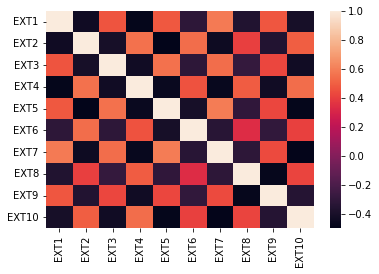

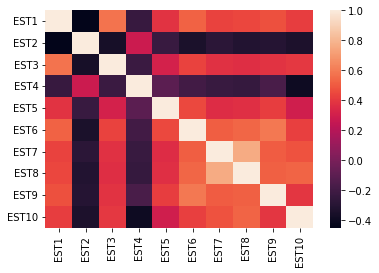

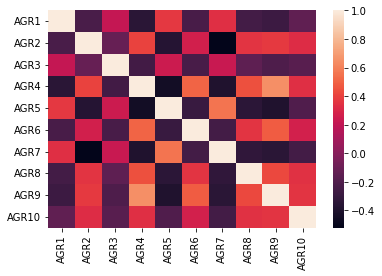

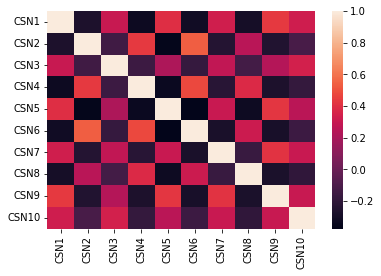

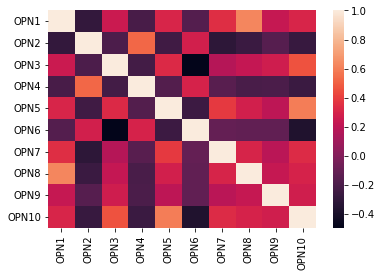

In [45]:
print(extrav.corr()['EXT1'])
sns.heatmap(extrav.corr())
plt.show()
sns.heatmap(agree.corr())
plt.show()
sns.heatmap(Consci.corr())
plt.show()
sns.heatmap(Emo.corr())
plt.show()
sns.heatmap(Intel.corr())
plt.show()

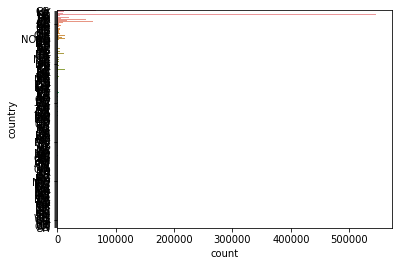

In [50]:
sns.countplot(y = 'country', data = df)
plt.show()

In [14]:
#find mean values of each response
extrav.mean(axis=0)

EXT1     2.648067
EXT2     2.773115
EXT3     3.288349
EXT4     3.140595
EXT5     3.276960
EXT6     2.401100
EXT7     2.771744
EXT8     3.414818
EXT9     2.963740
EXT10    3.556469
dtype: float64

In [15]:
agree.mean(axis=0)

EST1     3.285969
EST2     3.165072
EST3     3.846466
EST4     2.663756
EST5     2.843086
EST6     2.841154
EST7     3.050394
EST8     2.683485
EST9     3.088511
EST10    2.773504
dtype: float64

In [16]:
Consci.mean(axis=0)

AGR1     2.255316
AGR2     3.831103
AGR3     2.259957
AGR4     3.927497
AGR5     2.270857
AGR6     3.743075
AGR7     2.195806
AGR8     3.689389
AGR9     3.789116
AGR10    3.592351
dtype: float64

In [17]:
Emo.mean(axis=0)

CSN1     3.297999
CSN2     2.930295
CSN3     3.975280
CSN4     2.617866
CSN5     2.625832
CSN6     2.831821
CSN7     3.698187
CSN8     2.465306
CSN9     3.200695
CSN10    3.590596
dtype: float64

In [18]:
Intel.mean(axis=0)

OPN1     3.654636
OPN2     2.075933
OPN3     4.000068
OPN4     1.999891
OPN5     3.792905
OPN6     1.894605
OPN7     3.976375
OPN8     3.182453
OPN9     4.122993
OPN10    3.958441
dtype: float64

In [19]:
df1 = df.drop(df.columns[50:],axis=1)
#work with only first 50 columns

In [20]:
df1.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [21]:
df1.dropna(inplace=True)

In [22]:
len(df1)

1013558

In [23]:
print(extrav.corr()['EXT1'])

EXT1     1.000000
EXT2    -0.439143
EXT3     0.464780
EXT4    -0.486624
EXT5     0.478108
EXT6    -0.323412
EXT7     0.581620
EXT8    -0.368110
EXT9     0.470591
EXT10   -0.410360
Name: EXT1, dtype: float64


In [24]:
print(extrav.corr()['EXT2'])

EXT1    -0.439143
EXT2     1.000000
EXT3    -0.412251
EXT4     0.552499
EXT5    -0.500491
EXT6     0.541673
EXT7    -0.444508
EXT8     0.397680
EXT9    -0.364016
EXT10    0.490731
Name: EXT2, dtype: float64


In [25]:
from sklearn.decomposition import PCA
#trying principal component analysis if it is helpful

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scale = StandardScaler()
scale.fit(df1)
df1_scaled = scale.transform(df1)

In [28]:
#try to reduce the number of parameters to ease visualisation
pc = PCA(n_components=3)
pc.fit(df1_scaled)
x = pc.transform(df1_scaled)

In [29]:
x

array([[-4.28583134, -0.1191454 ,  1.93585691],
       [ 0.43620995,  1.33624982, -2.35617146],
       [-0.55053357,  1.32922021, -1.16385266],
       ...,
       [-1.47728011, -1.85510468,  3.53134847],
       [ 1.67993948,  0.10257733, -2.1275164 ],
       [-2.31006591, -1.48555727,  1.31422316]])

In [30]:
x.shape

(1013558, 3)

In [31]:
pc.components_

array([[-2.00267507e-01,  1.97736873e-01, -2.56533375e-01,
         2.16343020e-01, -2.40734687e-01,  2.01496123e-01,
        -2.27450356e-01,  1.48727280e-01, -1.80289436e-01,
         2.13204003e-01,  1.51031522e-01, -1.29461760e-01,
         1.17000488e-01, -1.05894413e-01,  1.28114910e-01,
         1.54926240e-01,  1.48414433e-01,  1.60554891e-01,
         1.66485882e-01,  1.91649349e-01,  9.28330566e-02,
        -1.82793317e-01,  8.52726380e-02, -1.11271456e-01,
         1.31951598e-01, -5.07649340e-02,  1.87833141e-01,
        -1.32198658e-01, -1.12005066e-01, -1.83998799e-01,
        -1.00913834e-01,  4.68080480e-02, -6.66962254e-02,
         1.40636206e-01, -1.00772595e-01,  8.71023222e-02,
        -3.95182704e-02,  1.25151183e-01, -8.55661431e-02,
        -8.92812212e-02, -7.11755896e-02,  9.52274327e-02,
        -4.58262268e-02,  6.97162983e-02, -1.33601742e-01,
         8.47799166e-02, -1.06773705e-01, -3.16552973e-02,
        -1.11808120e-02, -1.19665917e-01],
       [-9.88

In [32]:
pc.explained_variance_ratio_
#see how much variance is explained by each of the three parameters
#we find that together these explain only 30 percent of the variance so reduction of parameters is not going to be useful

array([0.14391615, 0.10000038, 0.07940049])

In [33]:
from sklearn.preprocessing import MinMaxScaler
#now we will do K-means clustering as only unsupervised learning algorithms can be applied

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
df_array = scaler.fit_transform(df1)
#scale the data between 0 and 1 to ease calculation

In [36]:
df2 = pd.DataFrame(df_array, columns=list(df1.columns))
df2.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0


In [37]:
from sklearn.cluster import KMeans


In [39]:
inertias = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1[:5000])
    inertias.append(kmeans.inertia_)


In [40]:
for i in range(5,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1[:5000])
    inertias.append(kmeans.inertia_)

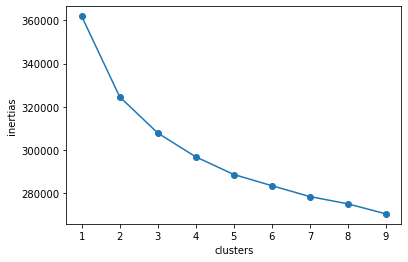

In [41]:
x = range(1,10)
plt.plot(x,inertias,marker='o')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()
#trying to visualise how many clusters will be optimal
#plot inertias v/s number of clusters
#optimal cluster number is that beyond which the graph is almost linear
#taking a small sample of data to minimise calculation
#4-6 clusters will be optimal
#we try 5 clusters as 5 different personality aspects are there

In [42]:
kmeans = KMeans(n_clusters = 5)
fit = kmeans.fit(df1)
#create cluster model

In [43]:
clusters = fit.labels_
df1['clusters'] = clusters
#cluster the data points
df1.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2


In [44]:
df_clustered = pd.DataFrame()
df_clustered['extrav'] = df.iloc[:,0:10].sum(axis=1)/10
df_clustered['agree'] = df.iloc[:,10:20].sum(axis=1)/10
df_clustered['consci'] = df.iloc[:,20:30].sum(axis=1)/10
df_clustered['emo'] = df.iloc[:,30:40].sum(axis=1)/10
df_clustered['intel'] = df.iloc[:,40:50].sum(axis=1)/10
df_clustered['clusters'] = clusters
df_clustered.groupby('clusters').mean()

,extrav,agree,consci,emo,intel
clusters,,,,,
0,2.966144,3.646226,3.149193,3.173613,3.245818
1,2.908787,2.527721,2.850910,2.914620,3.120608
2,3.085285,2.423264,3.208958,3.106687,3.327500
3,3.072262,3.427226,3.300172,3.211549,3.352302
4,3.052511,2.978599,3.187279,3.158124,3.242866


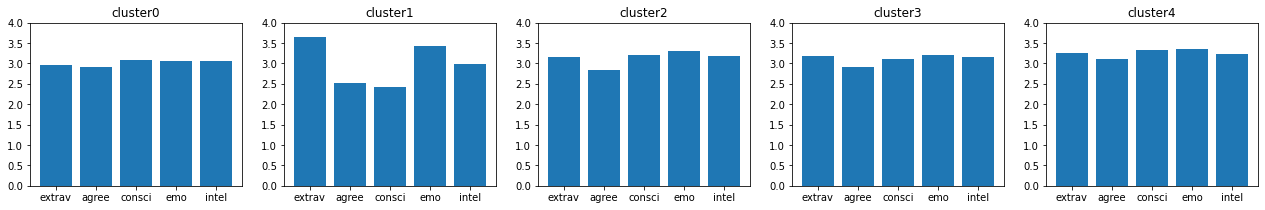

In [45]:
#visualise the mean values of each cluster 
dataclusters = df_clustered.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i])
    plt.title('cluster'+str(i))
    plt.ylim(0,4);

In [46]:
df_test = pd.read_csv('test-personality-detection.txt',sep=' ')

In [47]:
df_test

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,4,3,4,4,3,2,3,4,5,...,4,4,3,3,4,2,2,3,5,3


In [48]:
personality = fit.predict(df_test)
print('cluster:',personality)

cluster: [0]


In [49]:
data = pd.DataFrame()
data['extrav'] = df_test.iloc[:,0:10].sum(axis=1)/10
data['agree'] = df_test.iloc[:,10:20].sum(axis=1)/10
data['consci'] = df_test.iloc[:,20:30].sum(axis=1)/10
data['emo'] = df_test.iloc[:,30:40].sum(axis=1)/10
data['intel'] = df_test.iloc[:,40:50].sum(axis=1)/10
data

,extrav,agree,consci,emo,intel
0,3.4,3.3,2.7,3.0,3.3


(0.0, 4.0)

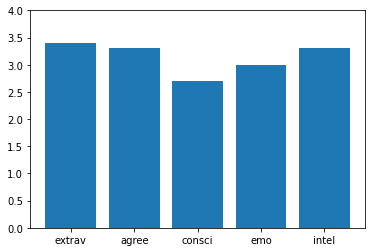

In [50]:
plt.bar(data.columns,data.iloc[0,:])
plt.ylim(0,4)

In [51]:
#alternate method to assign a rating to a response for each pesonality
#rating for extroversion personality
sum = 0
num = 0
for i in range(1,11):
    num += df_test['EXT'+str(i)][0]*df1['EXT'+str(i)].var()
    sum += df1['EXT'+str(i)].var()
print('score for extroversion personality:',num/sum)


score for extroversion personality: 3.396419675261679


In [52]:
sum = 0
num = 0
for i in range(1,11):
    num += df_test['EST'+str(i)][0]*df1['EST'+str(i)].var()
    sum += df1['EST'+str(i)].var()
print('score for neuroticism personality:',num/sum)

score for neuroticism personality: 3.3253450245345886


In [53]:
sum = 0
num = 0
for i in range(1,11):
    num += df_test['AGR'+str(i)][0]*df1['AGR'+str(i)].var()
    sum += df1['AGR'+str(i)].var()
print('score for agreeable personality:',num/sum)

score for agreeable personality: 2.6499775420628615


In [54]:
sum = 0
num = 0
for i in range(1,11):
    num += df_test['CSN'+str(i)][0]*df1['CSN'+str(i)].var()
    sum += df1['CSN'+str(i)].var()
print('score for conscientious personality:',num/sum)

score for conscientious personality: 3.048702612976345


In [55]:
sum = 0
num = 0
for i in range(1,11):
    num += df_test['OPN'+str(i)][0]*df1['OPN'+str(i)].var()
    sum += df1['OPN'+str(i)].var()
print('score for open personality:',num/sum)

score for open personality: 3.2930905823037078


In [ ]:
#we weigh the responses to questions with their variances
#assumption: more variance means question represents personality better
#we find that result is not much different if we simply take the mean of responses without weights
#may vary more in case of other data